# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [195]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(\textbf{x}) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

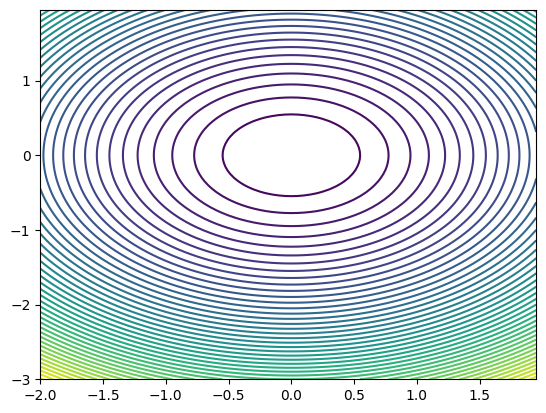

In [196]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

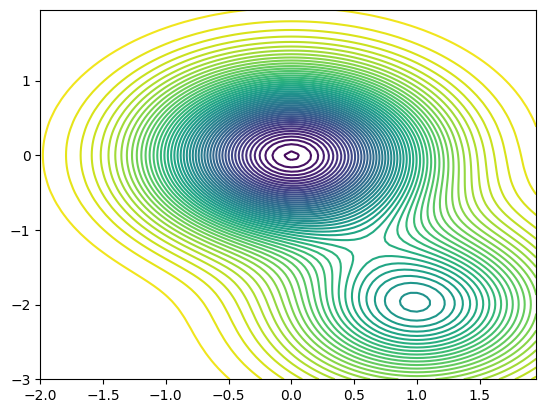

In [197]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [198]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if self.trace is not None:
            if len(self.trace)>0:
                plt.plot(self.trace[:,0], self.trace[:,1], color="red")

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        return np.array(x1, x2) - self.alpha * np.array(self.calculate_func_grad(x1, x2))

    def minimize(self, x1_init: float, x2_init: float, steps: int,
             verbose: int = 0, plot: bool = False) -> float:
        self.trace = np.array([[x1_init, x2_init], ])
        
        total_execution_time = 0
    
        for i in range(1, steps+1):
            start_time = time.time()
            result = self.gradient_descent_step(self.trace[i - 1, 0],
                                                self.trace[i - 1, 1])
            self.trace = np.append(self.trace, np.array([result]), axis=0)
            end_time = time.time()
            
            if verbose == 1 and i % 5 == 0:
                print(f"Step: {i:<3}\tCurrent position: ({result[0]: .2e},{result[1]: .2e})\tAlpha: {self.alpha:<3}")
            elif verbose == 2:
                print(f"Step: {i:<3}\tCurrent position: ({result[0]: .3e},{result[1]: .3e})\tAlpha: {self.alpha:<3}\tValue at position: {self.calculate_func_vale(result[0], result[1]):<.4e}")
            elif verbose == 3:
                print(f"Step: {i:<3}\tCurrent position: ({result[0]: .3e},{result[1]: .3e})\tAlpha: {self.alpha:<3}\tValue at position: {self.calculate_func_vale(result[0], result[1]):<.4e}\tStep executed in {end_time-start_time:<.4e} [s]")
                
            total_execution_time += (end_time-start_time)
        
        if verbose == 2 or verbose == 3:
            print(f"\nTotal execution time: {total_execution_time:<.4e} [s]")
            
        if plot:
            self.plot_func()
    
        return self.calculate_func_vale(self.trace[-1, 0], self.trace[-1, 1])

# Funkcja $f(\textbf{x})$
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
\nabla f(\textbf{x})=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

In [199]:
f = lambda x, y: x**2 + y**2
grad_f = lambda x, y: (2*x, 2*y)

### Pierwsze podejście

Parametry:
- Punkt początkowy $p = (-1.5, -2)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $100$

Step: 1  	Current position: (-1.200e+00,-1.100e+00)	Alpha: 0.1	Value at position: 2.6500e+00	Step executed in 4.3392e-05 [s]
Step: 2  	Current position: (-9.600e-01,-9.800e-01)	Alpha: 0.1	Value at position: 1.8820e+00	Step executed in 2.4557e-05 [s]
Step: 3  	Current position: (-7.680e-01,-7.640e-01)	Alpha: 0.1	Value at position: 1.1735e+00	Step executed in 2.4796e-05 [s]
Step: 4  	Current position: (-6.144e-01,-6.152e-01)	Alpha: 0.1	Value at position: 7.5596e-01	Step executed in 2.3365e-05 [s]
Step: 5  	Current position: (-4.915e-01,-4.914e-01)	Alpha: 0.1	Value at position: 4.8303e-01	Step executed in 2.1219e-05 [s]
Step: 6  	Current position: (-3.932e-01,-3.932e-01)	Alpha: 0.1	Value at position: 3.0926e-01	Step executed in 2.1219e-05 [s]
Step: 7  	Current position: (-3.146e-01,-3.146e-01)	Alpha: 0.1	Value at position: 1.9791e-01	Step executed in 2.4557e-05 [s]
Step: 8  	Current position: (-2.517e-01,-2.517e-01)	Alpha: 0.1	Value at position: 1.2666e-01	Step executed in 2.3365e-05 [s]


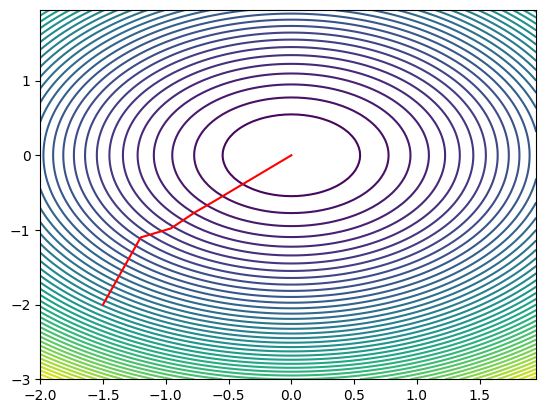

In [200]:
simple_grad_f_1 = SimpleGradientDescent(f, grad_f, alpha=0.1)
value_f_1 = simple_grad_f_1.minimize(-1.5, -2, 100, verbose=3, plot=True)

In [201]:
print(f"Minimum at: (0, 0)\tValue at minimum: {f(0, 0):.5e}\tCalculated: {value_f_1:.5e}\tError:{abs(f(0, 0)-value_f_1):.5e}")

Minimum at: (0, 0)	Value at minimum: 0.00000e+00	Calculated: 1.86728e-19	Error:1.86728e-19


### Drugie podejście - inny punkt początkowy

Parametry:
- Punkt początkowy $p = (-1.5, 1)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $50$

Step: 1  	Current position: ( 1.200e+00, 1.300e+00)	Alpha: 0.1	Value at position: 3.1300e+00	Step executed in 4.4823e-05 [s]
Step: 2  	Current position: ( 9.600e-01, 9.400e-01)	Alpha: 0.1	Value at position: 1.8052e+00	Step executed in 2.3842e-05 [s]
Step: 3  	Current position: ( 7.680e-01, 7.720e-01)	Alpha: 0.1	Value at position: 1.1858e+00	Step executed in 2.2650e-05 [s]
Step: 4  	Current position: ( 6.144e-01, 6.136e-01)	Alpha: 0.1	Value at position: 7.5399e-01	Step executed in 2.2173e-05 [s]
Step: 5  	Current position: ( 4.915e-01, 4.917e-01)	Alpha: 0.1	Value at position: 4.8334e-01	Step executed in 2.3365e-05 [s]
Step: 6  	Current position: ( 3.932e-01, 3.932e-01)	Alpha: 0.1	Value at position: 3.0921e-01	Step executed in 2.0981e-05 [s]
Step: 7  	Current position: ( 3.146e-01, 3.146e-01)	Alpha: 0.1	Value at position: 1.9792e-01	Step executed in 2.0504e-05 [s]
Step: 8  	Current position: ( 2.517e-01, 2.517e-01)	Alpha: 0.1	Value at position: 1.2666e-01	Step executed in 2.0742e-05 [s]


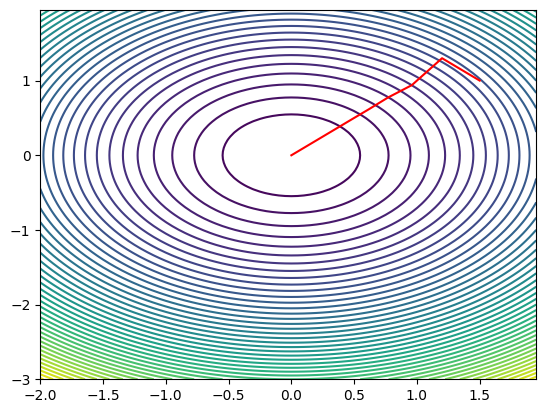

In [202]:
simple_grad_f_2 = SimpleGradientDescent(f, grad_f, alpha=0.1)
value_f_2 = simple_grad_f_2.minimize(1.5, 1, 100, verbose=3, plot=True)

In [203]:
print(f"Minimum at: (0, 0)\tValue at minimum: {f(0, 0):.5e}\tCalculated: {value_f_2:.5e}\tError:{abs(f(0, 0)-value_f_2):.5e}")

Minimum at: (0, 0)	Value at minimum: 0.00000e+00	Calculated: 1.86728e-19	Error:1.86728e-19


### Trzecie podejście - zwiększony krok

Parametry:
- Punkt początkowy $p = (-1.5, 1)$
- Parametr $\alpha = 0.9$
- Ilość kroków: $50$

Step: 1  	Current position: ( 0.000e+00, 5.000e-01)	Alpha: 0.5	Value at position: 2.5000e-01	Step executed in 4.2915e-05 [s]
Step: 2  	Current position: ( 0.000e+00,-5.000e-01)	Alpha: 0.5	Value at position: 2.5000e-01	Step executed in 2.3127e-05 [s]
Step: 3  	Current position: ( 0.000e+00, 5.000e-01)	Alpha: 0.5	Value at position: 2.5000e-01	Step executed in 1.5259e-05 [s]
Step: 4  	Current position: ( 0.000e+00,-5.000e-01)	Alpha: 0.5	Value at position: 2.5000e-01	Step executed in 2.2411e-05 [s]
Step: 5  	Current position: ( 0.000e+00, 5.000e-01)	Alpha: 0.5	Value at position: 2.5000e-01	Step executed in 2.0504e-05 [s]
Step: 6  	Current position: ( 0.000e+00,-5.000e-01)	Alpha: 0.5	Value at position: 2.5000e-01	Step executed in 1.9312e-05 [s]
Step: 7  	Current position: ( 0.000e+00, 5.000e-01)	Alpha: 0.5	Value at position: 2.5000e-01	Step executed in 1.9789e-05 [s]
Step: 8  	Current position: ( 0.000e+00,-5.000e-01)	Alpha: 0.5	Value at position: 2.5000e-01	Step executed in 1.9550e-05 [s]


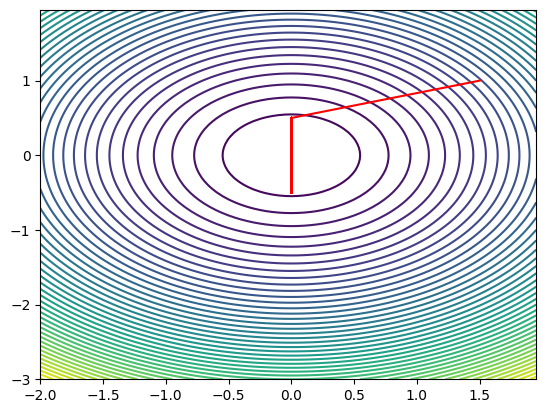

In [204]:
simple_grad_f_3 = SimpleGradientDescent(f, grad_f, alpha=0.5)
value_f_3 = simple_grad_f_3.minimize(1.5, 1, 100, verbose=3, plot=True)

In [205]:
print(f"Minimum at: (0, 0)\tValue at minimum: {f(0, 0):.5e}\tCalculated: {value_f_3:.5e}\tError:{abs(f(0, 0) - value_f_3):.5e}")

Minimum at: (0, 0)	Value at minimum: 0.00000e+00	Calculated: 2.50000e-01	Error:2.50000e-01


### Czwarte i piąte podejście - zmieniona liczba kroków

Parametry:
- Punkt początkowy $p = (-1.5, 1)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $10$ oraz $250$

Step: 1  	Current position: ( 1.200e+00, 1.300e+00)	Alpha: 0.1	Value at position: 3.1300e+00	Step executed in 4.0770e-05 [s]
Step: 2  	Current position: ( 9.600e-01, 9.400e-01)	Alpha: 0.1	Value at position: 1.8052e+00	Step executed in 2.1935e-05 [s]
Step: 3  	Current position: ( 7.680e-01, 7.720e-01)	Alpha: 0.1	Value at position: 1.1858e+00	Step executed in 2.1458e-05 [s]
Step: 4  	Current position: ( 6.144e-01, 6.136e-01)	Alpha: 0.1	Value at position: 7.5399e-01	Step executed in 2.0742e-05 [s]
Step: 5  	Current position: ( 4.915e-01, 4.917e-01)	Alpha: 0.1	Value at position: 4.8334e-01	Step executed in 1.9312e-05 [s]
Step: 6  	Current position: ( 3.932e-01, 3.932e-01)	Alpha: 0.1	Value at position: 3.0921e-01	Step executed in 1.9073e-05 [s]
Step: 7  	Current position: ( 3.146e-01, 3.146e-01)	Alpha: 0.1	Value at position: 1.9792e-01	Step executed in 1.8597e-05 [s]
Step: 8  	Current position: ( 2.517e-01, 2.517e-01)	Alpha: 0.1	Value at position: 1.2666e-01	Step executed in 1.8358e-05 [s]


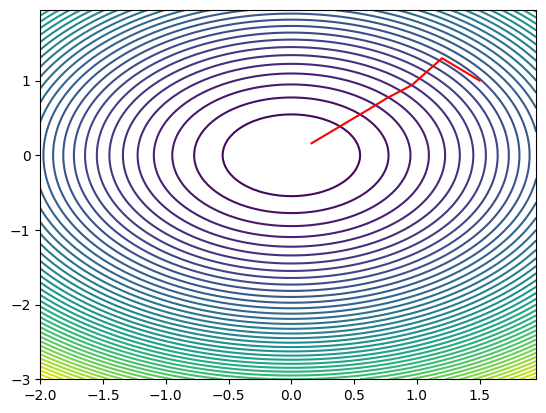

In [206]:
simple_grad_f_4 = SimpleGradientDescent(f, grad_f, alpha=0.1)
value_f_4 = simple_grad_f_4.minimize(1.5, 1, 10, verbose=3, plot=True)

In [207]:
print(f"Minimum at: (0, 0)\tValue at minimum: {f(0, 0):.5e}\tCalculated: {value_f_4:.5e}\tError:{abs(f(0, 0) - value_f_4):.5e}")

Minimum at: (0, 0)	Value at minimum: 0.00000e+00	Calculated: 5.18815e-02	Error:5.18815e-02


Step: 1  	Current position: ( 1.200e+00, 1.300e+00)	Alpha: 0.1	Value at position: 3.1300e+00	Step executed in 4.4107e-05 [s]
Step: 2  	Current position: ( 9.600e-01, 9.400e-01)	Alpha: 0.1	Value at position: 1.8052e+00	Step executed in 2.0266e-05 [s]
Step: 3  	Current position: ( 7.680e-01, 7.720e-01)	Alpha: 0.1	Value at position: 1.1858e+00	Step executed in 1.4305e-05 [s]
Step: 4  	Current position: ( 6.144e-01, 6.136e-01)	Alpha: 0.1	Value at position: 7.5399e-01	Step executed in 9.2268e-05 [s]
Step: 5  	Current position: ( 4.915e-01, 4.917e-01)	Alpha: 0.1	Value at position: 4.8334e-01	Step executed in 4.2915e-05 [s]
Step: 6  	Current position: ( 3.932e-01, 3.932e-01)	Alpha: 0.1	Value at position: 3.0921e-01	Step executed in 1.7166e-05 [s]
Step: 7  	Current position: ( 3.146e-01, 3.146e-01)	Alpha: 0.1	Value at position: 1.9792e-01	Step executed in 3.1233e-05 [s]
Step: 8  	Current position: ( 2.517e-01, 2.517e-01)	Alpha: 0.1	Value at position: 1.2666e-01	Step executed in 1.5497e-05 [s]


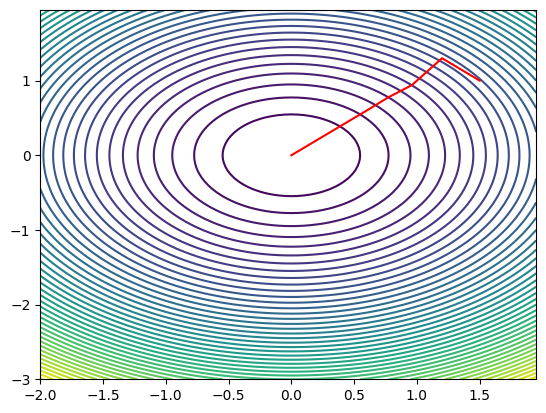

In [208]:
simple_grad_f_5 = SimpleGradientDescent(f, grad_f, alpha=0.1)
value_f_5 = simple_grad_f_5.minimize(1.5, 1, 250, verbose=3, plot=True)

In [209]:
print(f"Minimum at: (0, 0)\tValue at minimum: {f(0, 0):.5e}\tCalculated: {value_f_5:.5e}\tError:{abs(f(0, 0) - value_f_5):.5e}")

Minimum at: (0, 0)	Value at minimum: 0.00000e+00	Calculated: 1.57836e-48	Error:1.57836e-48


## Minimalizacja funkcji $f(\textbf{x})$ - wnioski

Jak widać na podstawie pięciu podejść zmiany parametrów początkowych algorytmu mogą mieć różny wpływ na ostateczne rozwiazanie.
W pierwszym przypadku, dla podstawowych wartości, widzimy, że algorytm sukcesywnie zbiega do minimum funkcji w punkcie $(0, 0)$ osiągjąc ostatecznie błąd $\epsilon = 1.86728e-19$. Jest do bardzo dobry wynik, jednak funkcja też nie jest zbyt skompliwowana.

W drugim przypadku, dla innego punktu początkowego i tych samych parametrów algorytmu, możemy zauważyć, że następuje zbieżność do tego samego punktu.

Trzeci przypadek rozważa pięciokrotne zwiększenie parametru $\alpha$, co teoretycznie powinno prowadzić do pogorszenia się właściwości algorytmu. W tym przypadku teoria pokrywa się z praktyką, ponieważ możemy zauważyć, że algorytm ma problem ze zbieganiem do minimum i w pewnym momencie zaczyna oscylować wokół minimum, nigdy go nie osiągając. Ma to swoją konsekwencję w postaci ostatecznego błędu rozwiązania, który ulega znacznemu pogorszeniu względem poprzednich dwóch podejść i wynosi $\epsilon = 5.18815e-02$

W czwartym i piątym podejściu, które opiszę tutaj łącznie, rozważany był wpływ ilości kroków na jakość rozwiązania. Z przeprowadzonych prób jednoznacznie wynika, że dla ilości kroków równej 10 i parametru $\alpha = 0.1$ algorytm nie zdąża zbiec do minium i zatrzymuje się w punkcie $(2.013e-01,2.013e-01)$ co skutkuje błędem rozwiązania o wartości $\epsilon = 8.10649e-02$. Z drugiej strony pięciokrotne zwiększenie ilości kroków powoduje znaczącą poprawę jakości rozwiązania osiągając ostatecznie wartość błędu na poziomie  $\epsilon = 1.57836e-48$


# Funkcja $g(\textbf{x})$
### Funkcja
\begin{equation}
g(\textbf{x}) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}
### Gradient
\begin{equation}
\nabla g(\textbf{x})=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [210]:
g = lambda x, y: 1.5 - np.exp(-x**2-y**2) - 0.5*np.exp(-(x-1)**2-(y+2)**2)

def grad_g(x, y):
    gradient = (2*x*np.exp(-x**2-y**2)+(x-1)*np.exp(-(x-1)**2-(y+2)**2),
                2*y*np.exp(-x**2-y**2)+(y+2)*np.exp(-(x-1)**2-(y+2)**2))
    return gradient


### Pierwsze podejście

Parametry:
- Punkt początkowy $p = (-0.5, 1)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $100$

Step: 1  	Current position: (-4.713e-01,-5.573e-01)	Alpha: 0.1	Value at position: 9.0586e-01	Step executed in 5.2929e-05 [s]
Step: 2  	Current position: (-4.139e-01,-4.080e-01)	Alpha: 0.1	Value at position: 7.8127e-01	Step executed in 2.8610e-05 [s]
Step: 3  	Current position: (-3.533e-01,-3.574e-01)	Alpha: 0.1	Value at position: 7.1782e-01	Step executed in 2.0266e-05 [s]
Step: 4  	Current position: (-2.970e-01,-2.996e-01)	Alpha: 0.1	Value at position: 6.5785e-01	Step executed in 1.8358e-05 [s]
Step: 5  	Current position: (-2.459e-01,-2.486e-01)	Alpha: 0.1	Value at position: 6.1017e-01	Step executed in 1.7643e-05 [s]
Step: 6  	Current position: (-2.012e-01,-2.037e-01)	Alpha: 0.1	Value at position: 5.7399e-01	Step executed in 1.7405e-05 [s]
Step: 7  	Current position: (-1.630e-01,-1.653e-01)	Alpha: 0.1	Value at position: 5.4801e-01	Step executed in 1.7166e-05 [s]
Step: 8  	Current position: (-1.311e-01,-1.333e-01)	Alpha: 0.1	Value at position: 5.3007e-01	Step executed in 1.6928e-05 [s]


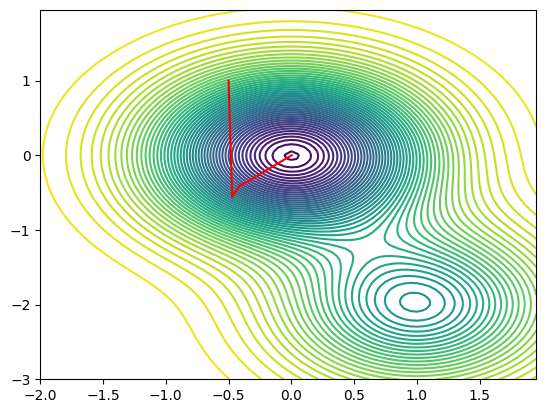

In [211]:
simple_grad_g_1 = SimpleGradientDescent(g, grad_g, alpha=0.1)
value_g_1 = simple_grad_g_1.minimize(-0.5, 1, 100, verbose=3, plot=True)

In [212]:
print(f"Minimum at: (0, 0)\tValue at minimum: {g(0, 0):.5e}\tCalculated: {value_g_1:.5e}\tError:{abs(g(0, 0) - value_g_1):.5e}")

Minimum at: (0, 0)	Value at minimum: 4.96631e-01	Calculated: 4.96645e-01	Error:1.40613e-05


### Drugie podejście - zmieniony punkt początkowy

Parametry:
- Punkt początkowy $p = (1.5, -3)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $100$

Step: 1  	Current position: ( 1.486e+00, 1.529e+00)	Alpha: 0.1	Value at position: 1.4894e+00	Step executed in 5.0068e-05 [s]
Step: 2  	Current position: ( 1.483e+00, 1.482e+00)	Alpha: 0.1	Value at position: 1.4877e+00	Step executed in 7.0333e-05 [s]
Step: 3  	Current position: ( 1.479e+00, 1.479e+00)	Alpha: 0.1	Value at position: 1.4874e+00	Step executed in 6.1750e-05 [s]
Step: 4  	Current position: ( 1.475e+00, 1.475e+00)	Alpha: 0.1	Value at position: 1.4871e+00	Step executed in 2.4557e-05 [s]
Step: 5  	Current position: ( 1.471e+00, 1.471e+00)	Alpha: 0.1	Value at position: 1.4868e+00	Step executed in 2.3603e-05 [s]
Step: 6  	Current position: ( 1.467e+00, 1.467e+00)	Alpha: 0.1	Value at position: 1.4865e+00	Step executed in 2.3842e-05 [s]
Step: 7  	Current position: ( 1.463e+00, 1.463e+00)	Alpha: 0.1	Value at position: 1.4862e+00	Step executed in 2.3603e-05 [s]
Step: 8  	Current position: ( 1.459e+00, 1.459e+00)	Alpha: 0.1	Value at position: 1.4859e+00	Step executed in 2.2888e-05 [s]


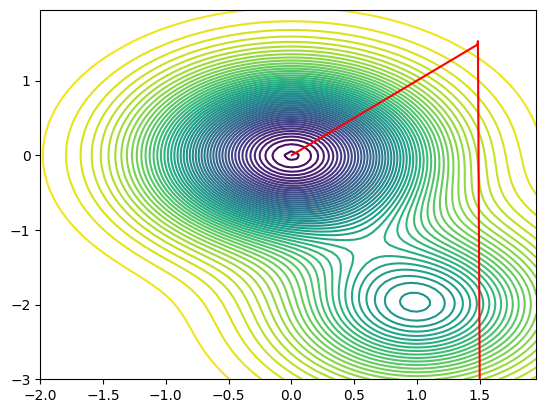

In [213]:
simple_grad_g_2 = SimpleGradientDescent(g, grad_g, alpha=0.1)
value_g_2 = simple_grad_g_2.minimize(1.5, -3, 100, verbose=3, plot=True)

In [214]:
print(f"Minimum at: (0, 0)\tValue at minimum: {g(0, 0):.5e}\tCalculated: {value_g_2:.5e}\tError:{abs(g(0, 0) - value_g_2):.5e}")

Minimum at: (0, 0)	Value at minimum: 4.96631e-01	Calculated: 4.96653e-01	Error:2.18278e-05


### Trzecie podejście - zmieniona wartość parametru $\alpha$

Parametry:
- Punkt początkowy $p = (-0.5, 1)$
- Parametr $\alpha = 0.5$
- Ilość kroków: $100$

Step: 1  	Current position: (-3.567e-01,-7.865e-01)	Alpha: 0.5	Value at position: 1.0075e+00	Step executed in 5.3406e-05 [s]
Step: 2  	Current position: (-1.628e-01,-5.761e-03)	Alpha: 0.5	Value at position: 5.2378e-01	Step executed in 2.7657e-05 [s]
Step: 3  	Current position: (-1.448e-03,-1.621e-01)	Alpha: 0.5	Value at position: 5.1967e-01	Step executed in 3.6240e-05 [s]
Step: 4  	Current position: ( 6.229e-03, 1.449e-01)	Alpha: 0.5	Value at position: 5.1895e-01	Step executed in 2.2173e-05 [s]
Step: 5  	Current position: ( 1.989e-03,-1.397e-01)	Alpha: 0.5	Value at position: 5.1353e-01	Step executed in 2.5511e-05 [s]
Step: 6  	Current position: ( 5.827e-03, 1.282e-01)	Alpha: 0.5	Value at position: 5.1432e-01	Step executed in 2.3603e-05 [s]
Step: 7  	Current position: ( 2.091e-03,-1.245e-01)	Alpha: 0.5	Value at position: 5.0991e-01	Step executed in 2.3603e-05 [s]
Step: 8  	Current position: ( 5.502e-03, 1.144e-01)	Alpha: 0.5	Value at position: 5.1091e-01	Step executed in 2.5988e-05 [s]


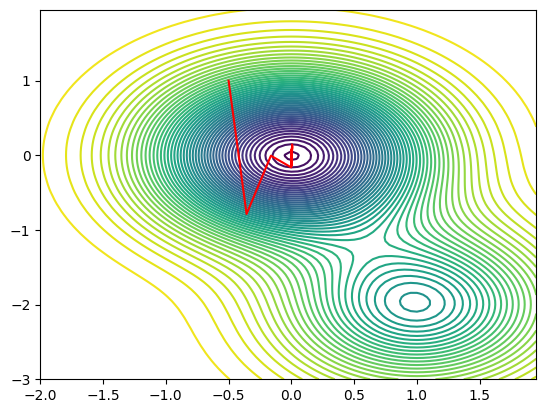

In [215]:
simple_grad_g_3 = SimpleGradientDescent(g, grad_g, alpha=0.5)
value_g_3 = simple_grad_g_3.minimize(-0.5, 1, 100, verbose=3, plot=True)

In [216]:
print(f"Minimum at: (0, 0)\tValue at minimum: {g(0, 0):.5e}\tCalculated: {value_g_3:.5e}\tError:{abs(g(0, 0) - value_g_3):.5e}")

Minimum at: (0, 0)	Value at minimum: 4.96631e-01	Calculated: 4.96636e-01	Error:5.16590e-06


### Czwarte i piąte podejście - zmieniona ilość kroków

Parametry:
- Punkt początkowy $p = (1.5, -3)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $10$ oraz $250$

Step: 1  	Current position: (-4.713e-01,-5.573e-01)	Alpha: 0.1	Value at position: 9.0586e-01	Step executed in 5.6505e-05 [s]
Step: 2  	Current position: (-4.139e-01,-4.080e-01)	Alpha: 0.1	Value at position: 7.8127e-01	Step executed in 2.7895e-05 [s]
Step: 3  	Current position: (-3.533e-01,-3.574e-01)	Alpha: 0.1	Value at position: 7.1782e-01	Step executed in 2.0027e-05 [s]
Step: 4  	Current position: (-2.970e-01,-2.996e-01)	Alpha: 0.1	Value at position: 6.5785e-01	Step executed in 1.8597e-05 [s]
Step: 5  	Current position: (-2.459e-01,-2.486e-01)	Alpha: 0.1	Value at position: 6.1017e-01	Step executed in 1.8120e-05 [s]
Step: 6  	Current position: (-2.012e-01,-2.037e-01)	Alpha: 0.1	Value at position: 5.7399e-01	Step executed in 1.7405e-05 [s]
Step: 7  	Current position: (-1.630e-01,-1.653e-01)	Alpha: 0.1	Value at position: 5.4801e-01	Step executed in 1.7166e-05 [s]
Step: 8  	Current position: (-1.311e-01,-1.333e-01)	Alpha: 0.1	Value at position: 5.3007e-01	Step executed in 1.6689e-05 [s]


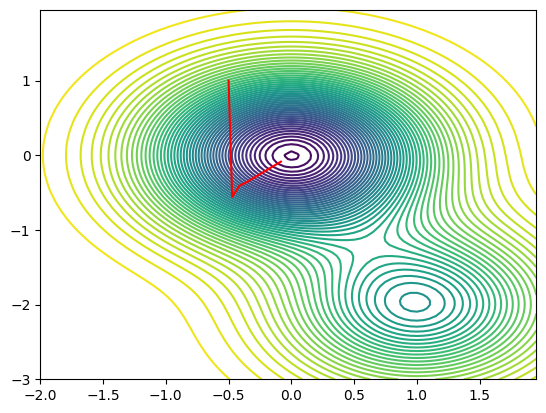

In [217]:
simple_grad_g_4 = SimpleGradientDescent(g, grad_g, alpha=0.1)
value_g_4 = simple_grad_g_4.minimize(-0.5, 1, 10, verbose=3, plot=True)

In [218]:
print(f"Minimum at: (0, 0)\tValue at minimum: {g(0, 0):.5e}\tCalculated: {value_g_4:.5e}\tError:{abs(g(0, 0) - value_g_4):.5e}")

Minimum at: (0, 0)	Value at minimum: 4.96631e-01	Calculated: 5.10193e-01	Error:1.35618e-02


Step: 1  	Current position: (-4.713e-01,-5.573e-01)	Alpha: 0.1	Value at position: 9.0586e-01	Step executed in 5.4121e-05 [s]
Step: 2  	Current position: (-4.139e-01,-4.080e-01)	Alpha: 0.1	Value at position: 7.8127e-01	Step executed in 2.7895e-05 [s]
Step: 3  	Current position: (-3.533e-01,-3.574e-01)	Alpha: 0.1	Value at position: 7.1782e-01	Step executed in 3.5048e-05 [s]
Step: 4  	Current position: (-2.970e-01,-2.996e-01)	Alpha: 0.1	Value at position: 6.5785e-01	Step executed in 2.6703e-05 [s]
Step: 5  	Current position: (-2.459e-01,-2.486e-01)	Alpha: 0.1	Value at position: 6.1017e-01	Step executed in 2.4319e-05 [s]
Step: 6  	Current position: (-2.012e-01,-2.037e-01)	Alpha: 0.1	Value at position: 5.7399e-01	Step executed in 2.3842e-05 [s]
Step: 7  	Current position: (-1.630e-01,-1.653e-01)	Alpha: 0.1	Value at position: 5.4801e-01	Step executed in 2.3127e-05 [s]
Step: 8  	Current position: (-1.311e-01,-1.333e-01)	Alpha: 0.1	Value at position: 5.3007e-01	Step executed in 2.3127e-05 [s]


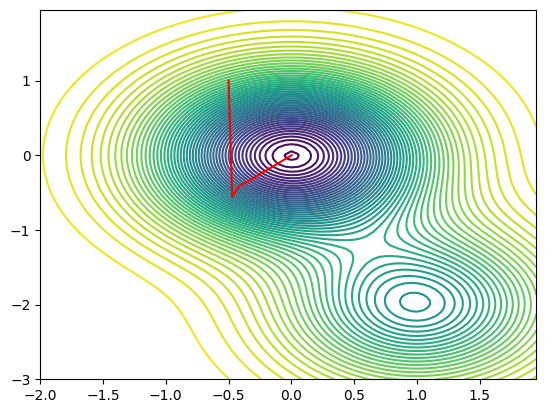

In [219]:
simple_grad_g_5 = SimpleGradientDescent(g, grad_g, alpha=0.1)
value_g_5 = simple_grad_g_5.minimize(-0.5, 1, 250, verbose=3, plot=True)

In [220]:
print(f"Minimum at: (0, 0)\tValue at minimum: {g(0, 0):.5e}\tCalculated: {value_g_5:.5e}\tError:{abs(g(0, 0) - value_g_5):.5e}")

Minimum at: (0, 0)	Value at minimum: 4.96631e-01	Calculated: 4.96645e-01	Error:1.40613e-05


## Minimalizacja funkcji $g(\textbf{x})$ - wnioski

Na samym początku należy zauważyć, że w przeciwieństwie do funkcji $f(\textbf{x})$ , funkcja $g(\textbf{x})$ posiada dwa minima lokalne, z których interesuje nas to, które jest jednocześnie minimum globalnym.

Tak samo jak w dla pierwszej funkcji, w tym przypadku widzimy zmianę zachowania algorytmu w zależności od zmian parametrów.

W pierwszym przypadku, dla podstawowych wartości, widzimy, że algorytm sukcesywnie zbiega do minimum funkcji w punkcie $(0, 0)$ osiągjąc ostatecznie błąd $\epsilon = 1.40613e-05$. Nie jest to wynik wybitny, w porównaniu do pierwszego podejścia dla funkcji $f(\textbf{x})$, natomiast nie jest też tragiczny.

Drugi podejście jest w tym przypadku ciekawsze, ponieważ zakłada start z punktu, który położony jest dalej od minimum globalnego i znajduje się blisko innego minimum o aspekcie lokalnym. Algorym radzi sobie z tym problemem bardzo dobrze, ciągle dążąc do minimum globalnego i osiągając ostatecznie rozwiązanie o błędzie tego samego rzędu.

W trzecim podejściu tak samo rozważamy pięciokrotne zwiększenie parametru $\alpha$, co jak już wspomnieliśmy powinno prowadzić do pogorszenia się rozwiązania, ze względu na oscylacje. Praktyka w tym przypadku okazuje się jednak zaskakująca, ponieważ pomimo występowania oscylacji, algorytm ostatecznie znajduje rozwiązanie, którego błąd jest mniejszy od tego z pierwszego i drugiego podejścia i wynosi $\epsilon = 5.16590e-06$.

Czwarte i piątek podejście, w przypadku rozważanej funkcji, które tak samo rozważa wpływ zmiany ilości kroków na jakość rozwiazania potwierdza obserwacje uzyskane przy badaniach algorytmu na funkcji $f(\textbf{x})$. Pięciokrotne zmniejszenie ilości kroków nie powoduje tak znaczącego pogorszenia wartości rozwiazania, w rozumieniu wartości funkcji w punkcie będącym rozwiązaniem, jednakże widoczne jest, że rozwiązanie to znajduje się dalej od rzeczywistego rozwiązania, które znajduje się w punkcie $(0, 0)$. Jest to spowodowane wolną spadkiem wartości funkcji w sąsiedztwie minimum globalnego. W przypadku pięciokrotnego zwiększenia ilości kroków, tak samo jak w przypadku funkcji $f(\textbf{x})$ zauważalna jest poprawa jakości rozwiązania, jednak nie jest ona aż tak spektakularna.